# Machine Learning

# CSV to Dataframe

In [1]:
#Import dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
import pandas as pd
import csv
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


In [2]:
#Import csv data World_Happiness_Report_2015.csv
World_Happiness_Report_2015_csv = os.path.join("data/World_Happiness_Report_2015.csv")
World_Happiness_Report_2015_df = pd.read_csv(World_Happiness_Report_2015_csv)
World_Happiness_Report_2015_df.rename(columns={'Region':'Region_2015','Happiness Rank':'Happiness_Rank_2015','Happiness Score':'Happiness_Score_2015','Standard Error':'Standard_Error_2015','Economy (GDP per Capita)':'GDP_per_Capita_2015','Family':'Family_2015','Health (Life Expectancy)':'Health_2015','Freedom':'Freedom_2015','Trust (Government Corruption)':'Government_Trust_2015','Generosity':'Generosity_2015','Dystopia Residual':'Dystopia_Residual_2015'
}, inplace=True)
World_Happiness_Report_2015_df.head()

,Country,Region_2015,Happiness_Rank_2015,Happiness_Score_2015,Standard_Error_2015,GDP_per_Capita_2015,Family_2015,Health_2015,Freedom_2015,Government_Trust_2015,Generosity_2015,Dystopia_Residual_2015
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
#Import csv data World_Happiness_Report_2016.csv
World_Happiness_Report_2016_csv = os.path.join("data/World_Happiness_Report_2016.csv")
World_Happiness_Report_2016_df = pd.read_csv(World_Happiness_Report_2016_csv)
World_Happiness_Report_2016_df.rename(columns={'Region':'Region_2016','Happiness Rank':'Happiness_Rank_2016','Happiness Score':'Happiness_Score_2016','Standard Error':'Standard_Error_2016','Economy (GDP per Capita)':'GDP_per_Capita_2016','Family':'Family_2016','Health (Life Expectancy)':'Health_2016','Freedom':'Freedom_2016','Trust (Government Corruption)':'Government_Trust_2016','Generosity':'Generosity_2016','Dystopia Residual':'Dystopia_Residual_2016'}, inplace=True)
World_Happiness_Report_2016_df.head()


,Country,Region_2016,Happiness_Rank_2016,Happiness_Score_2016,Lower Confidence Interval,Upper Confidence Interval,GDP_per_Capita_2016,Family_2016,Health_2016,Freedom_2016,Government_Trust_2016,Generosity_2016,Dystopia_Residual_2016
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [4]:
#Import csv data World_Happiness_Report_2017.csv
World_Happiness_Report_2017_csv = os.path.join("data/World_Happiness_Report_2017.csv")
World_Happiness_Report_2017_df = pd.read_csv(World_Happiness_Report_2017_csv)
World_Happiness_Report_2017_df.rename(columns={'Happiness.Rank':'Happiness-Rank_2017','Happiness.Score':'Happiness_Score_2017','Whisker.high':'Whisker_high_2017','Whisker.low':'Whisker_low_2017','Economy..GDP.per.Capita.':'GDP_per_Capita_2017','Family':'Family_2017','Health..Life.Expectancy.':'Health_2017','Freedom':'Freedom_2017','Generosity':'Generosity_2017','Trust..Government.Corruption.':'Government_Trust_2017','Dystopia.Residual':'Dystopia_Residual_2017'}, inplace=True)
World_Happiness_Report_2017_df.head()


,Country,Happiness-Rank_2017,Happiness_Score_2017,Whisker_high_2017,Whisker_low_2017,GDP_per_Capita_2017,Family_2017,Health_2017,Freedom_2017,Generosity_2017,Government_Trust_2017,Dystopia_Residual_2017
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [5]:
#Merge World_Happiness_Report 2015-2017 data
World_Happiness_Report_2015_2016_df = World_Happiness_Report_2015_df.merge(World_Happiness_Report_2016_df, on=['Country'], how='left')
World_Happiness_Report_2016_2017_df = World_Happiness_Report_2016_df.merge(World_Happiness_Report_2017_df, on=['Country'], how='left')
World_Happiness_Report_2015_2016_2017_df = World_Happiness_Report_2015_2016_df.merge(World_Happiness_Report_2017_df, on=['Country'], how='left')
World_Happiness_Report_2016_2017_df.head()



,Country,Region_2016,Happiness_Rank_2016,Happiness_Score_2016,Lower Confidence Interval,Upper Confidence Interval,GDP_per_Capita_2016,Family_2016,Health_2016,Freedom_2016,...,Happiness_Score_2017,Whisker_high_2017,Whisker_low_2017,GDP_per_Capita_2017,Family_2017,Health_2017,Freedom_2017,Generosity_2017,Government_Trust_2017,Dystopia_Residual_2017
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,...,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,...,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,...,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,...,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,...,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [6]:
#Import csv data Life_Expectancy_Data.csv
Life_Expectancy_Data_csv = os.path.join("data/Life_Expectancy_Data.csv")
Life_Expectancy_Data_df = pd.read_csv(Life_Expectancy_Data_csv)
#Loc 2015 data
Life_Expectancy_Data_df_2015 = Life_Expectancy_Data_df.loc[Life_Expectancy_Data_df['Year'] == 2015]
Life_Expectancy_Data_df_2015.rename(columns={'Life expectancy ':'Life_expectancy','Adult Mortality':'Adult_Mortality','infant deaths':'infant_deaths','percentage expenditure':'percentage_expenditure','Hepatitis B':'Hepatitis_B','under-five deaths ':'under_five_deaths','Total expenditure':'Total_expenditure',' HIV/AIDS':'HIV_AIDS',' thinness  1-19 years':' thinness_1_19_years',' thinness 5-9 years':'thinness_5_9_years','Income composition of resources':'Income'}, inplace=True)


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [7]:
#Merge  Life_Expectancy_Data_df_2015 and World_Happiness_Report_2015_df dataframes
World_Happiness_Life_Expectancy_df = World_Happiness_Report_2015_df.merge(Life_Expectancy_Data_df_2015, on=['Country'], how='left')
World_Happiness_Life_Expectancy_df.describe()
#Drop empty year
World_Happiness_Life_Expectancy_df = World_Happiness_Life_Expectancy_df.replace({'NaN': None})
World_Happiness_Life_Expectancy_df_dropyear = World_Happiness_Life_Expectancy_df[World_Happiness_Life_Expectancy_df.Year.notna()]
World_Happiness_Life_Expectancy_df_dropyear.head()


,Country,Region_2015,Happiness_Rank_2015,Happiness_Score_2015,Standard_Error_2015,GDP_per_Capita_2015,Family_2015,Health_2015,Freedom_2015,Government_Trust_2015,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income,Schooling
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,97.0,NaN,97.0,0.1,8989.84240,8282396.0,0.4,0.3,0.938,16.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,92.0,NaN,92.0,0.1,5734.44360,33815.0,1.0,0.9,0.919,19.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,93.0,NaN,93.0,0.1,5314.64416,5683483.0,1.1,0.9,0.923,19.2
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,95.0,NaN,95.0,0.1,7455.24654,518867.0,0.8,0.7,0.948,17.7
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,91.0,NaN,91.0,0.1,43315.74400,3584861.0,0.6,0.5,0.919,16.3


In [8]:
#Import csv data Average_usual_weekly_hours_worked_on_the_main_job.csv
weekly_hours_avg_worked_job_csv = os.path.join("data/Average_usual_weekly_hours_worked_on_the_main_job.csv")
weekly_hours_avg_worked_job_df = pd.read_csv(weekly_hours_avg_worked_job_csv)
weekly_hours_avg_worked_job_df_2015_2016_2017_df = weekly_hours_avg_worked_job_df.loc[weekly_hours_avg_worked_job_df['Time'] > 2015]
weekly_hours_avg_worked_job_df_2015_2016_2017_df.drop(['COUNTRY', 'SEX', 'AGE', 'EMPSTAT', 'JOBTYPE', 'FREQUENCY','Time'], axis=1, inplace=True)
weekly_hours_avg_worked_job_df_2015_2016_2017_df.rename(columns={'Employment status':'Employment_status','Job type':'Job_type','Unit Code':'Unit_Code','PowerCode Code':'PowerCode_Code','Reference Period Code':'Reference_Period_Code','Reference Period':'Reference_Period','Flag Codes':'Flag_Codes'}, inplace=True)
#Merge world Happinies and Weekly worked hors
weekly_hours_avg_worked_job_ml_df = weekly_hours_avg_worked_job_df_2015_2016_2017_df.loc[(weekly_hours_avg_worked_job_df_2015_2016_2017_df['Job_type'] == 'Total declared employment') & (weekly_hours_avg_worked_job_df_2015_2016_2017_df['TIME'] == 2017) & (weekly_hours_avg_worked_job_df_2015_2016_2017_df['Sex'] == 'All persons') & (weekly_hours_avg_worked_job_df_2015_2016_2017_df["Age"] == 'Total') & (weekly_hours_avg_worked_job_df_2015_2016_2017_df["Employment_status"] == 'Total employment')]
weekly_hours_avg_worked_job_ml_df_value = weekly_hours_avg_worked_job_ml_df[['Country','Value']]
weekly_hours_avg_worked_job_ml_df_value_new = World_Happiness_Report_2017_df.merge(weekly_hours_avg_worked_job_ml_df_value, on=['Country'], how='left')
#Drop empty Values
weekly_hours_avg_worked_job_ml_df_value_new_drop = weekly_hours_avg_worked_job_ml_df_value_new.replace({'NaN': None})
weekly_hours_avg_worked_job_ml_df_value_new_drop = weekly_hours_avg_worked_job_ml_df_value_new_drop[weekly_hours_avg_worked_job_ml_df_value_new_drop.Value.notna()]

weekly_hours_avg_worked_job_ml_df_value_new_drop.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Country,Happiness-Rank_2017,Happiness_Score_2017,Whisker_high_2017,Whisker_low_2017,GDP_per_Capita_2017,Family_2017,Health_2017,Freedom_2017,Generosity_2017,Government_Trust_2017,Dystopia_Residual_2017,Value
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,33.202360
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,39.181510
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,34.648933
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,36.723757
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,30.370301


# SQLite

In [9]:
#Import dataframes into DB
#Note: If you get: "ValueError: Table 'table_name' already exists" go end delete World_Happiness_Life_Expectancy_db.sqlite under /flask/db directory
disk_engine = create_engine('sqlite:///flask/db/World_Happiness_Life_Expectancy_db.sqlite')
World_Happiness_Life_Expectancy_df_dropyear.to_sql('World_Happiness_Life_Expectancy_tb', disk_engine, if_exists='replace')
World_Happiness_Report_2015_2016_2017_df.to_sql('World_Happiness_Report_2015_2016_2017_tb', disk_engine, if_exists='replace')
weekly_hours_avg_worked_job_df_2015_2016_2017_df.to_sql('weekly_hours_avg_worked_job_df_2015_2017_tb', disk_engine, if_exists='replace')


In [10]:
## Select from sql lite
df_sql_select_example = pd.read_sql_query('SELECT * FROM World_Happiness_Life_Expectancy_tb',disk_engine)
df_sql_select_example.head()

,index,Country,Region_2015,Happiness_Rank_2015,Happiness_Score_2015,Standard_Error_2015,GDP_per_Capita_2015,Family_2015,Health_2015,Freedom_2015,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income,Schooling
0,0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,...,97.0,NaN,97.0,0.1,8989.84240,8282396.0,0.4,0.3,0.938,16.0
1,1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,...,92.0,NaN,92.0,0.1,5734.44360,33815.0,1.0,0.9,0.919,19.0
2,2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,...,93.0,NaN,93.0,0.1,5314.64416,5683483.0,1.1,0.9,0.923,19.2
3,3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,...,95.0,NaN,95.0,0.1,7455.24654,518867.0,0.8,0.7,0.948,17.7
4,4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,...,91.0,NaN,91.0,0.1,43315.74400,3584861.0,0.6,0.5,0.919,16.3


# Linear regression Freedom vs Happiness score
In simple linear regression, we establish a relationship between target variable and input variables by fitting a line, known as the regression line.

In general, a line can be represented by linear equation y = m * X + b. Where, y is the dependent variable, X is the independent variable, m is the slope, b is the intercept.

Shape:  (135, 1) (135, 1)


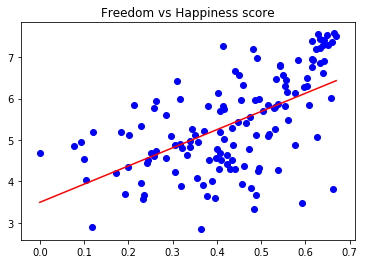

In [11]:
# Create the model and fit the model to the data
# Assign the data to X and y
X = World_Happiness_Life_Expectancy_df_dropyear.Freedom_2015.values.reshape(-1, 1)
y = World_Happiness_Life_Expectancy_df_dropyear.Happiness_Score_2015.values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

model = LinearRegression()
model.fit(X, y)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
y_min = model.predict(x_min)
y_max = model.predict(x_max)
#Plot
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.title('Freedom vs Happiness score')
plt.savefig('flask/static/img/World_Happiness_Life_Expectancy_linear.png')

# Linear regression - working hours vs Happiness score

Shape:  (33, 1) (33, 1)


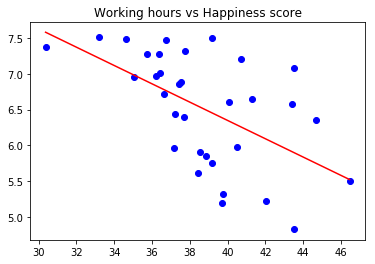

In [12]:
# Create the model and fit the model to the data
# Assign the data to X and y
X = weekly_hours_avg_worked_job_ml_df_value_new_drop.Value.values.reshape(-1, 1)
y = weekly_hours_avg_worked_job_ml_df_value_new_drop.Happiness_Score_2017.values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

model = LinearRegression()
model.fit(X, y)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
y_min = model.predict(x_min)
y_max = model.predict(x_max)
#Plot
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.title('Working hours vs Happiness score')
plt.savefig('flask/static/img/weekly_hours_avg_worked_linear.png')

# Multiple linear regression 
# Happiness Score vs Adult Mortality, Life expectancy, GDP, Family, Health, Freedom and Income
The above equation can be used when we have one input variable (also called feature). However, in general, we usually deal with datasets which have multiple input variables. The case when we have more than one feature is known as multiple linear regression, or simply, linear regression. We can generalize our previous equation for simple linear regression to multiple linear regression:

(135, 7) (135, 1)
Training Score: 0.7725722616477944
Testing Score: 0.7902419236405253


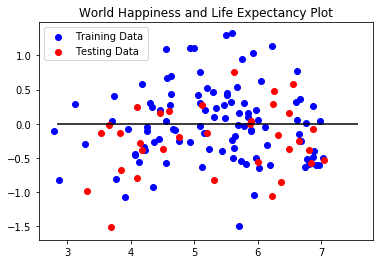

In [13]:
# Assign the data to X and y
X = World_Happiness_Life_Expectancy_df_dropyear[['Adult_Mortality','Life_expectancy','GDP_per_Capita_2015','Family_2015','Health_2015','Freedom_2015','Income']]
y = World_Happiness_Life_Expectancy_df_dropyear["Happiness_Score_2015"].values.reshape(-1, 1)
print(X.shape, y.shape)

# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("World Happiness and Life Expectancy Plot")
plt.savefig('flask/static/img/World_Happiness_Life_Expectancy_multilinear.png')

In [14]:
#MSE and R2
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.22718257792731464, R2: 0.7902419236405283


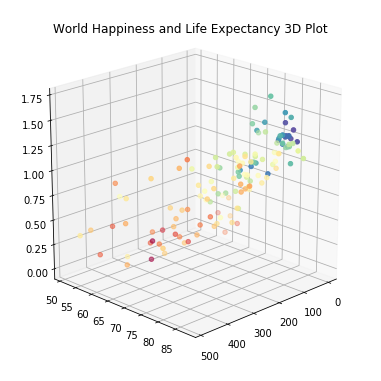

In [15]:
# Multiple linier 3D
X = World_Happiness_Life_Expectancy_df_dropyear[['Adult_Mortality','Life_expectancy','GDP_per_Capita_2015','Family_2015','Health_2015','Freedom_2015','Income']]
y = World_Happiness_Life_Expectancy_df_dropyear["Happiness_Score_2015"]
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=y, cmap=plt.cm.get_cmap("Spectral"))
plt.title("World Happiness and Life Expectancy 3D Plot")
plt.savefig('flask/static/img/World_Happiness_Life_Expectancy_multilinear_3d.png', bbox_inches='tight')
plt.show()

# K-Means
K-Means is a algorithm which clusters the data into K number of clusters

In [16]:
#import Dependencies
from scipy import stats
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import cluster, mixture # For clustering 
import types
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline

In [17]:
n_clusters=2
def Kmeans(x, y):
    km= cluster.KMeans(x)
    km_result=km.fit_predict(y)
    return(km_result)

In [18]:
country = World_Happiness_Report_2017_df[World_Happiness_Report_2017_df.columns[0]]
data = World_Happiness_Report_2017_df.iloc[:,2:]
def normalizedData(x):
    normalised = StandardScaler()
    normalised.fit_transform(x)
    return(x)
data.head()

,Happiness_Score_2017,Whisker_high_2017,Whisker_low_2017,GDP_per_Capita_2017,Family_2017,Health_2017,Freedom_2017,Generosity_2017,Government_Trust_2017,Dystopia_Residual_2017
0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


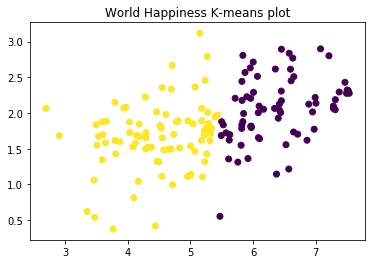

In [19]:
data = normalizedData(data)
km_result = Kmeans(2,data)
data['Kmeans'] = pd.DataFrame(km_result)
plt.scatter(data.iloc[:, 0], data.iloc[:, 9],  c=km_result)
plt.title("World Happiness K-means plot")
plt.savefig('flask/static/img/World_Happiness_2017_kmeans.png', bbox_inches='tight')
plt.show()

In [20]:
dataset=pd.concat([data,country],axis=1)
dataset.head(3)

,Happiness_Score_2017,Whisker_high_2017,Whisker_low_2017,GDP_per_Capita_2017,Family_2017,Health_2017,Freedom_2017,Generosity_2017,Government_Trust_2017,Dystopia_Residual_2017,Kmeans,Country
0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,0,Norway
1,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,0,Denmark
2,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,0,Iceland


In [21]:
#KMeans Clustering plot
dataPlot = dict(type = 'choropleth', 
           locations = dataset['Country'],
           locationmode = 'country names',
           z = dataset['Kmeans'], 
           text = dataset['Country'],
           colorbar = {'title':'Cluster Group'})
layout = dict(title = 'World Happiness - Kmeans Clustering', 
           geo = dict(showframe = False, 
           projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [dataPlot], layout=layout)
iplot(choromap3) 

In [22]:
#import Dependencies
import statsmodels.formula.api as stats
from statsmodels.formula.api import ols
import sklearn
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error
import plotly.plotly as py 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [23]:
happiness_2015_df = pd.read_csv("data/World_Happiness_Report_2015.csv")
happiness_2016_df = pd.read_csv("data/World_Happiness_Report_2016.csv")
happiness_2017_df = pd.read_csv("data/World_Happiness_Report_2017.csv")


In [24]:
happiness_2015_df.columns = ['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard Error', 'Economy', 'Family',
       'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia_Residual']
columns_2015 = ['Region', 'Standard Error']
new_dropped_2015 = happiness_2015_df.drop(columns_2015, axis=1)

In [25]:
columns_2016 = ['Region', 'Lower Confidence Interval','Upper Confidence Interval' ]
dropped_2016 = happiness_2016_df.drop(columns_2016, axis=1)
dropped_2016.columns = ['Country', 'Happiness_Rank', 'Happiness_Score','Economy', 'Family',
       'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia_Residual']

In [26]:
columns_2017 = ['Whisker.high','Whisker.low' ]
dropped_2017 = happiness_2017_df.drop(columns_2017, axis=1)
dropped_2017.columns = ['Country', 'Happiness_Rank', 'Happiness_Score','Economy', 'Family',
       'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia_Residual']

In [27]:
frames = [new_dropped_2015, dropped_2016, dropped_2017]
happiness = pd.concat(frames)

In [28]:
happiness.head()
happiness.describe()


,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,78.829787,5.370728,0.927830,0.990347,0.579968,0.402828,0.175605,0.201426,2.092717
std,45.281408,1.136998,0.415584,0.318707,0.240161,0.150356,0.131909,0.133211,0.565772
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.000000,4.509000,0.605292,0.793000,0.402301,0.297615,0.075792,0.098303,1.737975
50%,79.000000,5.282500,0.995439,1.025665,0.630053,0.418347,0.139081,0.181624,2.094640
75%,118.000000,6.233750,1.252443,1.228745,0.768298,0.516850,0.249839,0.275505,2.455575
max,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.838075,0.819710,3.837720


In [29]:
#to make work this graph, install plotly version 2.0: pip install plotly==2.0.0
data6 = dict(type = 'choropleth', 
           locations = happiness['Country'],
           locationmode = 'country names',
           z = happiness['Happiness_Rank'], 
           text = happiness['Country'],
          colorscale = 'Viridis', reversescale = False)
layout = dict(title = 'Happiness Rank Across the World', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap6 = go.Figure(data = [data6], layout=layout)
iplot(choromap6)

In [30]:
data2 = dict(type = 'choropleth', 
           locations = happiness['Country'],
           locationmode = 'country names',
           z = happiness['Happiness_Score'], 
           text = happiness['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Happiness Score Across the World', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [data2], layout=layout)
iplot(choromap3)